In [1]:
    # Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
    # Import our data into pandas from Excel
path = 'output_data/cleansed_dataframe.xlsx'
ticket_df = pd.read_excel(path)

ticket_df.head()

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Creation Year,Creation Month,Creation Day,Due_Date,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/05/18 22:07,11/20/18 21:00,11/16/18 07:45,MyHRW,...,2018,11,5,2018-11-20,21:00:00,2018,11,20,2018-11-16,07:45:00
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/05/18 23:00,11/13/18 22:01,11/05/18 23:21,MyHRW,...,2018,11,5,2018-11-13,22:01:00,2018,11,13,2018-11-05,23:21:00
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/06/18 04:18,11/07/18 22:01,11/06/18 04:52,MyHRW,...,2018,11,6,2018-11-07,22:01:00,2018,11,7,2018-11-06,04:52:00
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,11/06/18 04:58,11/08/18 22:01,11/06/18 05:04,MyHRW,...,2018,11,6,2018-11-08,22:01:00,2018,11,8,2018-11-06,05:04:00
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/06/18 06:06,11/13/18 22:01,11/06/18 07:31,MyHRW,...,2018,11,6,2018-11-13,22:01:00,2018,11,13,2018-11-06,07:31:00


In [3]:
    # Create a new DataFrame that looks into a closed tickets
closed_ticket_df = ticket_df.loc[ticket_df["Status"] == "Closed"]
closed_ticket_df

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Creation Year,Creation Month,Creation Day,Due_Date,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/05/18 22:07,11/20/18 21:00,11/16/18 07:45,MyHRW,...,2018,11,5,2018-11-20,21:00:00,2018,11,20,2018-11-16,07:45:00
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/05/18 23:00,11/13/18 22:01,11/05/18 23:21,MyHRW,...,2018,11,5,2018-11-13,22:01:00,2018,11,13,2018-11-05,23:21:00
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/06/18 04:18,11/07/18 22:01,11/06/18 04:52,MyHRW,...,2018,11,6,2018-11-07,22:01:00,2018,11,7,2018-11-06,04:52:00
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,11/06/18 04:58,11/08/18 22:01,11/06/18 05:04,MyHRW,...,2018,11,6,2018-11-08,22:01:00,2018,11,8,2018-11-06,05:04:00
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/06/18 06:06,11/13/18 22:01,11/06/18 07:31,MyHRW,...,2018,11,6,2018-11-13,22:01:00,2018,11,13,2018-11-06,07:31:00
5,8181383,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/13/18 21:01,11/21/18 22:43,11/20/18 09:16,MyHRW,...,2018,11,13,2018-11-21,22:43:00,2018,11,21,2018-11-20,09:16:00
6,8220727,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/18/18 22:20,11/19/18 22:20,11/18/18 22:39,MyHRW,...,2018,11,18,2018-11-19,22:20:00,2018,11,19,2018-11-18,22:39:00
7,8220768,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/18/18 23:08,11/28/18 05:14,11/21/18 07:22,MyHRW,...,2018,11,18,2018-11-28,05:14:00,2018,11,28,2018-11-21,07:22:00
8,8220801,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/18/18 23:46,11/21/18 00:45,11/19/18 01:20,MyHRW,...,2018,11,18,2018-11-21,00:45:00,2018,11,21,2018-11-19,01:20:00
9,8773563,AU,APAC,Closed,E-mail,MYHRW_JuliusB,01/23/19 08:53,01/24/19 21:00,01/23/19 10:10,MyHRW,...,2019,1,23,2019-01-24,21:00:00,2019,1,24,2019-01-23,10:10:00


In [4]:
    # Add a column with the difference between due date and closed date

closed_ticket_df['Closed Date'] =  pd.to_datetime(closed_ticket_df['Closed Date'])
closed_ticket_df['Due Date'] =  pd.to_datetime(closed_ticket_df['Due Date'])

closed_ticket_df['Difference'] = closed_ticket_df['Closed Date'].sub(closed_ticket_df['Due Date'], axis=0)
closed_ticket_df['Difference'] = round(closed_ticket_df['Difference'] / np.timedelta64(1, 'D'),0)



closed_ticket_df.head(200)

C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: Settin

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Creation Month,Creation Day,Due_Date,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time,Difference
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/05/18 22:07,2018-11-20 21:00:00,2018-11-16 07:45:00,MyHRW,...,11,5,2018-11-20,21:00:00,2018,11,20,2018-11-16,07:45:00,-5.0
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/05/18 23:00,2018-11-13 22:01:00,2018-11-05 23:21:00,MyHRW,...,11,5,2018-11-13,22:01:00,2018,11,13,2018-11-05,23:21:00,-8.0
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,11/06/18 04:18,2018-11-07 22:01:00,2018-11-06 04:52:00,MyHRW,...,11,6,2018-11-07,22:01:00,2018,11,7,2018-11-06,04:52:00,-2.0
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,11/06/18 04:58,2018-11-08 22:01:00,2018-11-06 05:04:00,MyHRW,...,11,6,2018-11-08,22:01:00,2018,11,8,2018-11-06,05:04:00,-3.0
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/06/18 06:06,2018-11-13 22:01:00,2018-11-06 07:31:00,MyHRW,...,11,6,2018-11-13,22:01:00,2018,11,13,2018-11-06,07:31:00,-8.0
5,8181383,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/13/18 21:01,2018-11-21 22:43:00,2018-11-20 09:16:00,MyHRW,...,11,13,2018-11-21,22:43:00,2018,11,21,2018-11-20,09:16:00,-2.0
6,8220727,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/18/18 22:20,2018-11-19 22:20:00,2018-11-18 22:39:00,MyHRW,...,11,18,2018-11-19,22:20:00,2018,11,19,2018-11-18,22:39:00,-1.0
7,8220768,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/18/18 23:08,2018-11-28 05:14:00,2018-11-21 07:22:00,MyHRW,...,11,18,2018-11-28,05:14:00,2018,11,28,2018-11-21,07:22:00,-7.0
8,8220801,AU,APAC,Closed,E-mail,MYHRW_JuliusB,11/18/18 23:46,2018-11-21 00:45:00,2018-11-19 01:20:00,MyHRW,...,11,18,2018-11-21,00:45:00,2018,11,21,2018-11-19,01:20:00,-2.0
9,8773563,AU,APAC,Closed,E-mail,MYHRW_JuliusB,01/23/19 08:53,2019-01-24 21:00:00,2019-01-23 10:10:00,MyHRW,...,1,23,2019-01-24,21:00:00,2019,1,24,2019-01-23,10:10:00,-1.0


In [5]:
closed_ticket_df['Creation Date'] =  pd.to_datetime(closed_ticket_df['Creation Date'])

closed_ticket_df['SLA Timeframe'] = closed_ticket_df['Due Date'].sub(closed_ticket_df['Creation Date'], axis=0)
closed_ticket_df['SLA Timeframe'] = round(closed_ticket_df['SLA Timeframe'] / np.timedelta64(1, 'D'),0)



closed_ticket_df.head(200)

C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py

,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Creation Day,Due_Date,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time,Difference,SLA Timeframe
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-05 22:07:00,2018-11-20 21:00:00,2018-11-16 07:45:00,MyHRW,...,5,2018-11-20,21:00:00,2018,11,20,2018-11-16,07:45:00,-5.0,15.0
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,2018-11-05 23:00:00,2018-11-13 22:01:00,2018-11-05 23:21:00,MyHRW,...,5,2018-11-13,22:01:00,2018,11,13,2018-11-05,23:21:00,-8.0,8.0
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,2018-11-06 04:18:00,2018-11-07 22:01:00,2018-11-06 04:52:00,MyHRW,...,6,2018-11-07,22:01:00,2018,11,7,2018-11-06,04:52:00,-2.0,2.0
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,2018-11-06 04:58:00,2018-11-08 22:01:00,2018-11-06 05:04:00,MyHRW,...,6,2018-11-08,22:01:00,2018,11,8,2018-11-06,05:04:00,-3.0,3.0
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-06 06:06:00,2018-11-13 22:01:00,2018-11-06 07:31:00,MyHRW,...,6,2018-11-13,22:01:00,2018,11,13,2018-11-06,07:31:00,-8.0,8.0
5,8181383,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-13 21:01:00,2018-11-21 22:43:00,2018-11-20 09:16:00,MyHRW,...,13,2018-11-21,22:43:00,2018,11,21,2018-11-20,09:16:00,-2.0,8.0
6,8220727,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-18 22:20:00,2018-11-19 22:20:00,2018-11-18 22:39:00,MyHRW,...,18,2018-11-19,22:20:00,2018,11,19,2018-11-18,22:39:00,-1.0,1.0
7,8220768,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-18 23:08:00,2018-11-28 05:14:00,2018-11-21 07:22:00,MyHRW,...,18,2018-11-28,05:14:00,2018,11,28,2018-11-21,07:22:00,-7.0,9.0
8,8220801,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-18 23:46:00,2018-11-21 00:45:00,2018-11-19 01:20:00,MyHRW,...,18,2018-11-21,00:45:00,2018,11,21,2018-11-19,01:20:00,-2.0,2.0
9,8773563,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2019-01-23 08:53:00,2019-01-24 21:00:00,2019-01-23 10:10:00,MyHRW,...,23,2019-01-24,21:00:00,2019,1,24,2019-01-23,10:10:00,-1.0,2.0


In [6]:
closed_ticket_df['Turn Around'] = closed_ticket_df['Closed Date'].sub(closed_ticket_df['Creation Date'], axis=0)
closed_ticket_df['Turn Around'] = round(closed_ticket_df['Turn Around'] / np.timedelta64(1, 'D'),0)
closed_ticket_df.head()

C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Due_Date,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time,Difference,SLA Timeframe,Turn Around
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-05 22:07:00,2018-11-20 21:00:00,2018-11-16 07:45:00,MyHRW,...,2018-11-20,21:00:00,2018,11,20,2018-11-16,07:45:00,-5.0,15.0,10.0
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,2018-11-05 23:00:00,2018-11-13 22:01:00,2018-11-05 23:21:00,MyHRW,...,2018-11-13,22:01:00,2018,11,13,2018-11-05,23:21:00,-8.0,8.0,0.0
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,2018-11-06 04:18:00,2018-11-07 22:01:00,2018-11-06 04:52:00,MyHRW,...,2018-11-07,22:01:00,2018,11,7,2018-11-06,04:52:00,-2.0,2.0,0.0
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,2018-11-06 04:58:00,2018-11-08 22:01:00,2018-11-06 05:04:00,MyHRW,...,2018-11-08,22:01:00,2018,11,8,2018-11-06,05:04:00,-3.0,3.0,0.0
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-06 06:06:00,2018-11-13 22:01:00,2018-11-06 07:31:00,MyHRW,...,2018-11-13,22:01:00,2018,11,13,2018-11-06,07:31:00,-8.0,8.0,0.0


In [7]:
def f(row):
    if row['Closed Date'] < row['Due Date']:
        val = "Yes"
    else:
        val = "No"
    return val


closed_ticket_df['SLA Met'] = closed_ticket_df.apply(f, axis=1)

closed_ticket_df.head()


C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Case ID,Company,Region,Status,Source,Current Agent,Creation Date,Due Date,Closed Date,Service Group,...,Due Time,Due Year,Due Month,Due Day,Closed_Date,Closed Time,Difference,SLA Timeframe,Turn Around,SLA Met
0,8111665,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-05 22:07:00,2018-11-20 21:00:00,2018-11-16 07:45:00,MyHRW,...,21:00:00,2018,11,20,2018-11-16,07:45:00,-5.0,15.0,10.0,Yes
1,8111974,AU,APAC,Closed,E-mail,MyHRW_AdamSu,2018-11-05 23:00:00,2018-11-13 22:01:00,2018-11-05 23:21:00,MyHRW,...,22:01:00,2018,11,13,2018-11-05,23:21:00,-8.0,8.0,0.0,Yes
2,8112663,AU,APAC,Closed,E-mail,MyHRW_AdamSu,2018-11-06 04:18:00,2018-11-07 22:01:00,2018-11-06 04:52:00,MyHRW,...,22:01:00,2018,11,7,2018-11-06,04:52:00,-2.0,2.0,0.0,Yes
3,8112727,AU,APAC,Closed,Interface,MyHRW_AdamSu,2018-11-06 04:58:00,2018-11-08 22:01:00,2018-11-06 05:04:00,MyHRW,...,22:01:00,2018,11,8,2018-11-06,05:04:00,-3.0,3.0,0.0,Yes
4,8112910,AU,APAC,Closed,E-mail,MYHRW_JuliusB,2018-11-06 06:06:00,2018-11-13 22:01:00,2018-11-06 07:31:00,MyHRW,...,22:01:00,2018,11,13,2018-11-06,07:31:00,-8.0,8.0,0.0,Yes


In [8]:
#Count Total Tickets
total_tickets = pd.DataFrame(columns=['Total Tickets'])
ticket_count = closed_ticket_df['Company'].count()
total_tickets = total_tickets.append({'Total Tickets' : ticket_count}, ignore_index=True)
total_tickets

,Total Tickets
0,61688


In [9]:
SLA_subset = closed_ticket_df.groupby(['SLA Met'])
SLA_summary = pd.DataFrame(SLA_subset["SLA Met"].count())

SLA_percent = round((SLA_summary['SLA Met']/ticket_count)*100,2)
SLA_summary['Percentage'] = SLA_percent

SLA_summary = SLA_summary.rename(columns={"SLA Met":"Total Count"})

SLA_summary

,Total Count,Percentage
SLA Met,,
No,1106,1.79
Yes,60582,98.21


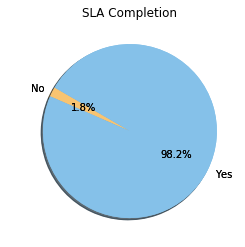

In [10]:
    #Pie Chart
    # Build Pie Chart
colors = [ "#F8C471", "#85C1E9","#F08080"]
SLA_summary.plot(kind = "pie",y=SLA_summary.keys(),colors=colors,
          autopct="%1.1f%%",startangle=150, title ="SLA Completion", legend= False,shadow=True)
plt.axis('off')

    # Save Figure
plt.savefig("Images/3_Total Fares by City Type.png",bbox_inches = "tight")

    # Show Figure
plt.show()

In [11]:
    #SLA Completion by Service Center

Service_Center_SLA = closed_ticket_df.groupby(['Service Center'])
Service_Center_SLA_summary = pd.DataFrame(Service_Center_SLA["Service Center"].count())
    #Add a column for Service Center = Yes
    #Add a column for SLA Completion % by service center
print(Service_Center_SLA_summary['Service Center'].sum())
Service_Center_SLA_summary


61688


,Service Center
Service Center,
Buenos Aires,1748
Dalian,3028
Granada,18363
Jacksonville,31405
Katowice,2815
Manila,1663
St Johns,1582
Washington DC,1084


In [12]:
    #SLA Average Days 
    #SLA Completion by Service Center

Type_SLA = closed_ticket_df.groupby(['User Group'])
Type_SLA_summary = pd.DataFrame(Type_SLA["Service Center"].count())


Type_SLA2 = closed_ticket_df.groupby(['User Group'])
Type_SLA2_summary = pd.DataFrame(round(Type_SLA2["SLA Timeframe"].mean(),0))

Type_SLA3 = closed_ticket_df.groupby(['User Group'])
Type_SLA_summary3 = pd.DataFrame(round(Type_SLA3["Turn Around"].mean(),0))
 
type_df = Type_SLA2_summary.merge(Type_SLA_summary3, right_on='User Group',left_on='User Group' )

type_df = type_df.reset_index()


type_df

,User Group,SLA Timeframe,Turn Around
0,Not Assigned,9.0,1.0
1,Tier 1,49.0,3.0
2,Tier 2 - Business HR,2.0,1.0
3,Tier 2 - Compensation,6.0,7.0
4,Tier 2 - Data Control,16.0,2.0
5,Tier 2 - Other,43.0,6.0
6,Tier 2 - Other,15.0,13.0
7,Tier 2 - Others,10.0,5.0
8,Tier 2 - Payroll,228.0,8.0
9,Tier 3 - Payroll,269.0,11.0


In [13]:
    #SLA Average Days 
Service_Center_SLA2 = closed_ticket_df.groupby(['Service Center'])
Service_Center_SLA_summary2 = pd.DataFrame(round(Service_Center_SLA2["SLA Timeframe"].mean(),0))

Service_Center_SLA3 = closed_ticket_df.groupby(['Service Center'])
Service_Center_SLA_summary3 = pd.DataFrame(round(Service_Center_SLA3["Turn Around"].mean(),0))
 
SLA_DF = Service_Center_SLA_summary2.merge(Service_Center_SLA_summary3, right_on='Service Center',left_on='Service Center' )

SLA_DF = SLA_DF.reset_index()
print(type(Service_Center_SLA_summary2))
print(type(Service_Center_SLA_summary3))

SLA_DF

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,Service Center,SLA Timeframe,Turn Around
0,Buenos Aires,21.0,8.0
1,Dalian,360.0,4.0
2,Granada,20.0,6.0
3,Jacksonville,55.0,2.0
4,Katowice,69.0,6.0
5,Manila,21.0,4.0
6,St Johns,62.0,4.0
7,Washington DC,295.0,9.0


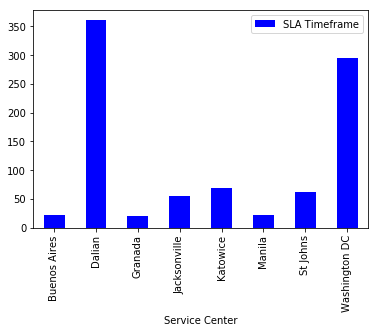

In [14]:
ax = SLA_DF.plot.bar(x='Service Center', y='SLA Timeframe', rot=90, color='b')

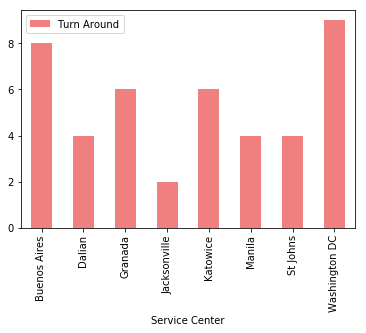

In [15]:
ax = SLA_DF.plot.bar(x='Service Center', y='Turn Around', rot=90, color='lightcoral')

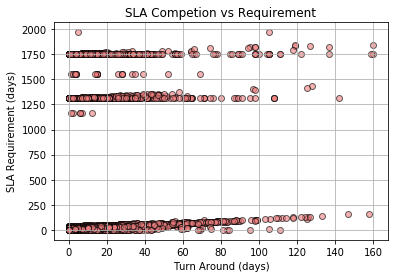

In [16]:
x = list(closed_ticket_df["Turn Around"])
y = list(closed_ticket_df["SLA Timeframe"])
    # urban_z = list(urban_df["driver_count"]*10)



    # Build the scatter plots for each city types
plt.scatter(x, y, c="#F08080", alpha = 0.6, edgecolors="black", linewidth=1)

    # Incorporate the other graph properties
plt.xlabel("Turn Around (days)")
plt.ylabel("SLA Requirement (days)")
plt.title("SLA Competion vs Requirement")
plt.grid(True)


    # Show Figure
plt.savefig("Images/4_SLA Scatter.png")

    # Show Figure
plt.show()


In [17]:
    #Binning the SLA Timeframe

bins = [-1, 5, 10, 30, 1000, 10000]

    # Create the names for the four bins
group_names = ["<5","5-10", "10-30", "30-1000", "1K+"]

    #Categorize the existing players using the age bins. Hint: use pd.cut()
closed_ticket_df["SLA Days"] = pd.cut(closed_ticket_df["SLA Timeframe"], bins, labels=group_names)

Due_Date_Age =closed_ticket_df.groupby("SLA Days")

SLA_Days_Summary= pd.DataFrame(Due_Date_Age["Company"].count())
SLA_Days_Summary = SLA_Days_Summary.rename(columns={"Company":"Ticket Count"})
print(SLA_Days_Summary)

SLA_percent2 = (SLA_Days_Summary['Ticket Count']/ticket_count)*100
print(SLA_percent2)
SLA_Days_Summary['Percentage'] = SLA_percent2

SLA_Days_Summary = SLA_Days_Summary.rename(columns={"Ticket Count":"Percentage"})
SLA_Days_Summary
    # #SLA_Days_Summary['Percentage'].sum()
    # print(SLA_Days_Summary['Ticket Count'].sum())
    # closed_ticket_df
    # closed_ticket_df.to_excel("output.xlsx")

C:\Users\boninjv\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


          Ticket Count
SLA Days              
<5               34045
5-10             12891
10-30            10128
30-1000           2364
1K+               2260
SLA Days
<5         55.189016
5-10       20.897095
10-30      16.418104
30-1000     3.832188
1K+         3.663597
Name: Ticket Count, dtype: float64


,Percentage,Percentage
SLA Days,,
<5,34045,55.189016
5-10,12891,20.897095
10-30,10128,16.418104
30-1000,2364,3.832188
1K+,2260,3.663597


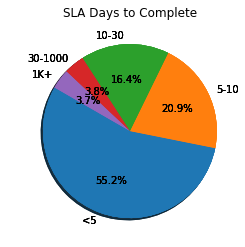

In [18]:
    #Pie Chart
    # Build Pie Chart
    # colors = [ "#F8C471", "#85C1E9","#F08080"]
SLA_Days_Summary.plot(kind = "pie",
                      y=SLA_Days_Summary.keys(),
                      startangle=150, 
                      title ="SLA Days to Complete", 
                      legend= False,
                      shadow=True,
                      autopct='%1.1f%%')
plt.axis('off')

# Save Figure
plt.savefig("Images/5_SLA Days Group.png")

# Show Figure
plt.show()

